In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations_JB import *
from proj1_helpers import *
%load_ext autoreload
%autoreload 2

In [2]:
def ultimate_split(yb, input_data, ids):
    """
    The ultimate split. THE real BADA$$.
    This is some real shit
    """
    
    mask_0 = (input_data[:,22] == 0)
    mask_1 = (input_data[:,22] == 1)
    mask_2 = (input_data[:,22] == 2)
    mask_3 = (input_data[:,22] == 3)

    
    return yb[mask_0], yb[mask_1], yb[mask_2], yb[mask_3], \
input_data[mask_0], input_data[mask_1], input_data[mask_2], input_data[mask_3], \
ids[mask_0], ids[mask_1], ids[mask_2], ids[mask_3]

In [3]:
def remove_features_0(input_data_0):
    """
    Remove the useless features if the jet num feature is equal to 0
    """
    useless_features_index = [4, 5, 6, 12, 23, 24, 25 , 26, 27, 28]# , 30, 33]
    
    mask = np.ones(int(input_data_0.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    return input_data_0[:,mask]

def remove_features_1(input_data_1):
    """
    Remove the useless features if the jet num feature is equal to 1
    """
    useless_features_index = [4, 5, 6, 26, 27, 28]#, 30, 33]
    
    mask = np.ones(int(input_data_1.shape[1]), dtype=bool)
    mask[(useless_features_index)] = False
    return input_data_1[:,mask]

    # No need for jet_num equal to 2 or 3 : all the features are kept   

In [4]:
def angle_features_processing(data_path):
    """
    We want to change all the features representing an angle into two features
    one for cosinus of the angle and another for sinus of the angle.
    """
    
    yb, input_data, ids = load_csv_data(data_path,sub_sample = False)

    angle_features = [15, 18, 20, 25, 28]
    
    new_data = np.zeros((input_data.shape[0], input_data.shape[1] + len(angle_features) ))
    
    for k in range(input_data.shape[1]):
        if k not in angle_features:
            new_data[:, k] = input_data[:, k]
        
    for idx, column in enumerate(angle_features): 
        
        new_data[:, column] = np.cos(input_data[:, column])
        new_data[:, input_data.shape[1] + idx] = np.sin(input_data[:, column])
    
    return yb, new_data, ids

In [5]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    poly = np.ones((len(x), 1))
    for deg in range(1, degree+1):
        poly = np.c_[poly, np.power(x, deg)]
    return poly

In [6]:
def least_squares_implementation(yb, data, ids, max_deg):
    """
    The inputs of this function are arrays containing the data from the separation into 4 parts
    depending on the value of the jet_num index
    """
    
    best_deg = np.zeros(4)
    min_loss = np.Inf*np.ones(4)
    w = np.zeros((4, max_deg+1))
    losses = np.zeros((4, max_deg+1))
    
    for i in range(3):
        # We test for polynomes from degree 0 to max_deg
        for deg in range(max_deg + 1):

            poly = build_poly(data[i], deg)
            w[i, deg], losses[i, deg] = least_squares(yb[i], poly)
            
            if (losses[i, deg] < min_loss[i]):
                min_loss[i] = losses[i, deg]
                best_deg[i] = deg
            
    return w[0, best_deg[0]], w[1, best_deg[1]], w[2, best_deg[2]], w[3, best_deg[3]] 

In [15]:
# Processing the angle features
yb, input_data, ids =  angle_features_processing("train.csv")
#yb, input_data, ids = load_csv_data("train.csv",sub_sample = False)
yb_test, input_data_test, ids_test = angle_features_processing("test.csv")

yb0, yb1, yb2, yb3, data0, data1, data2, data3, ids0, ids1, ids2, ids3 = ultimate_split(yb, input_data, ids)

yb0t, yb1t, yb2t, yb3t, data0t, data1t, data2t, data3t, ids0t, ids1t, ids2t, ids3t = ultimate_split(yb_test, input_data_test, ids_test)
data0t, data1t, data2t, data3t = standardize(data0t), standardize(data1t), standardize(data2t), standardize(data3t)


data0, data1 = remove_features_0(data0), remove_features_1(data1)
data0t, data1t = remove_features_0(data0t), remove_features_1(data1t)

data0, data1, data2, data3 = standardize(data0), standardize(data1), standardize(data2), standardize(data3)
data0t, data1t, data2t, data3t = standardize(data0t), standardize(data1t), standardize(data2t), standardize(data3t)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
yb = np.array([yb0,yb1,yb2,yb3])
data = np.array([data0,data1,data2,data3])
ids = np.array([ids0,ids1,ids2,ids3])

ybt = np.array([yb0t,yb1t,yb2t,yb3t])
datat = np.array([data0t,data1t,data2t,data3t])
idst = np.array([ids0t,ids1t,ids2t,ids3t])

w0, w1, w2, w3 = least_squares_implementation(yb, data, ids, 10)

(99913L,)
3.022436146427818e-17
0.9999999999999999


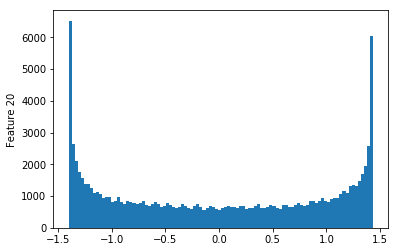

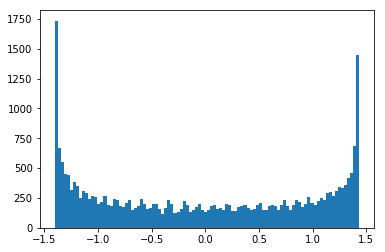

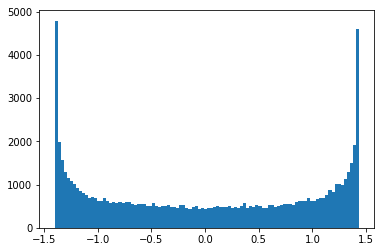

(99913L,)
3.0046571102723605e-17
1.0


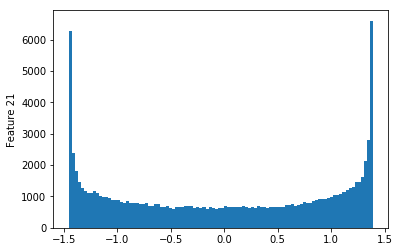

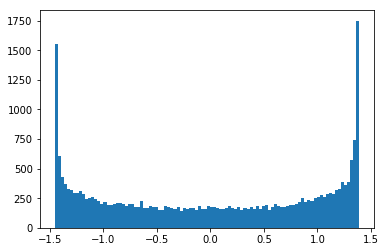

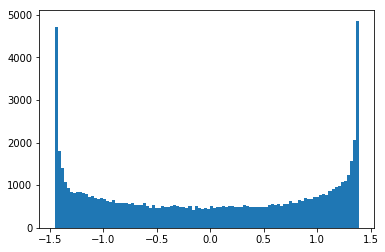

(99913L,)
-2.3788350376002473e-17
0.9999999999999998


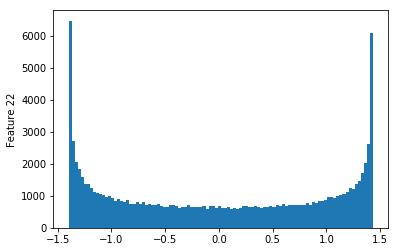

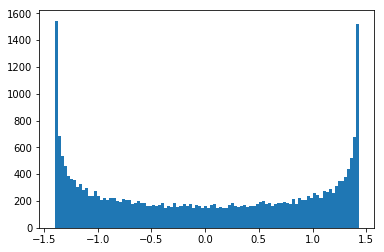

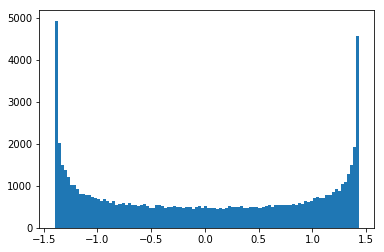

(99913L,)
inf
nan


C:\Programmes\Anaconda\lib\site-packages\numpy\core\_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


ValueError: range parameter must be finite.

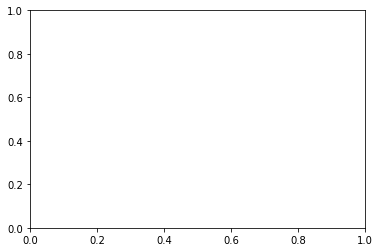

In [13]:
def histo(index_feature, yb, data,bins):
    data_array = data[:,index_feature]
    print data_array.shape

    data_mask = np.where(yb>0, True, False) # Transforming in a boolean mask
    print np.mean(data_array)
    print np.std(data_array)
    plt.hist(data_array,bins)
    plt.ylabel("Feature "+str(i))
    plt.figure()
    plt.hist(data_array[data_mask],bins)
    plt.figure()
    plt.hist(data_array[np.invert(data_mask)],bins)
    plt.show()
for i in range(20,30):    
    histo(i,yb0, data0,100)

In [ ]:
def submission_ridge_4split(deg0, deg1, deg2, deg3,lambda0, lambda1, lambda2, lambda3):
    
    #For the jet_num 0 data
    yb_t, input_data_t, ids_t =  angle_features_processing("test.csv")
    input_data_t = standardize(input_data_t)
    yb0t, yb1t, yb2t, yb3t, data0t, data1t, data2t, data3t, ids0t, ids1t, ids2t, ids3t = ultimate_split(yb_t, input_data_t, ids_t)

    data0t = remove_features_0(data0t)
    data1t = remove_features_1(data1t)
    data0t = standardize(data0t)
    data1t = standardize(data1t)
    data2t = standardize(data2t)
    data3t = standardize(data3t)
        
    poly_test0 = build_poly(data0t, deg0)

    poly0 = build_poly(data0,deg0)
    w, train_loss, test_loss, y_pred0 = ridge(yb0t, poly_test0, yb0, poly0,lambda0)
    
    #For the jet_num 1 data
    poly_test1 = build_poly(data1t, deg1)
    poly1 = build_poly(data1,deg1)
    w, train_loss, test_loss, y_pred1 = ridge(yb1t, poly_test1, yb1, poly1,lambda1)
    
    #For the jet_num 2 data
    poly_test2 = build_poly(data2t, deg2)
    poly2 = build_poly(data2,deg2)
    w, train_loss, test_loss, y_pred2 = ridge(yb2t, poly_test2, yb2, poly2,lambda2)

    #For the jet_num 3 data
    poly_test3 = build_poly(data3t, deg3)
    poly3 = build_poly(data3,deg3)
    w, train_loss, test_loss, y_pred3 = ridge(yb3t, poly_test3, yb3, poly3,lambda3)

    
    
    final_ids_test = np.concatenate((ids0t, ids1t, ids2t, ids3t))
    final_y_pred = np.concatenate((y_pred0,y_pred1,y_pred2,y_pred3))
    create_csv_submission(final_ids_test, final_y_pred, "pred_4split.csv")
    
submission_ridge_4split(7,8,8,9,10,10,10,10) 

In [14]:
x = np.array([1,1,1,-1,1,-1,1])
y = np.array([1,2,3,4,5,6,7])
x = np.where(x>0, True, False)
print y[np.invert(x)]

[4 6]


In [50]:
data0.shape

(99913L, 25L)

In [60]:
prout = data0[:,8]
print data0.shape

(99913L, 25L)
